In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_dir=r'C:\Users\IICET 8\Desktop\shreya\archive (6)\train\train'
test_dir=r'C:\Users\IICET 8\Desktop\shreya\archive (6)\test\test'

print(f"Number of blue crab images in training set:{len(os.listdir(os.path.join(train_dir,'blue_crab')))}")
print(f"Number of coconut crab images in training set:{len(os.listdir(os.path.join(train_dir,'coconut_crab')))}")
print(f"Number of king crab images in training set:{len(os.listdir(os.path.join(train_dir,'king_crab')))}")
print(f"Number of mud crab images in training set:{len(os.listdir(os.path.join(train_dir,'mud_crab')))}")
print(f"Number of stone crab images in training set:{len(os.listdir(os.path.join(train_dir,'stone_crab')))}")
print(f"Number of vampire crab images in training set:{len(os.listdir(os.path.join(train_dir,'vampire_crab')))}")

print(f"Number of blue crab images in test set:{len(os.listdir(os.path.join(test_dir,'blue_crab')))}")
print(f"Number of coconut crab images in test set:{len(os.listdir(os.path.join(test_dir,'coconut_crab')))}")
print(f"Number of king crab images in test set:{len(os.listdir(os.path.join(test_dir,'king_crab')))}")
print(f"Number of mud crab images in test set:{len(os.listdir(os.path.join(test_dir,'mud_crab')))}")
print(f"Number of stone crab images in test set:{len(os.listdir(os.path.join(test_dir,'stone_crab')))}")
print(f"Number of vampire crab images in test set:{len(os.listdir(os.path.join(test_dir,'vampire_crab')))}")



Number of blue crab images in training set:70
Number of coconut crab images in training set:70
Number of king crab images in training set:46
Number of mud crab images in training set:40
Number of stone crab images in training set:40
Number of vampire crab images in training set:62
Number of blue crab images in test set:5
Number of coconut crab images in test set:5
Number of king crab images in test set:5
Number of mud crab images in test set:5
Number of stone crab images in test set:5
Number of vampire crab images in test set:5


blue_crab images:


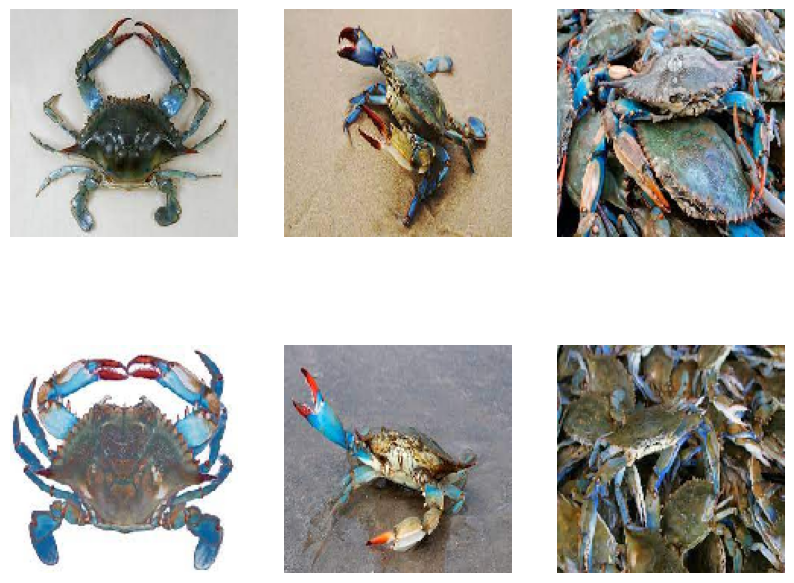

coconut_crab images:


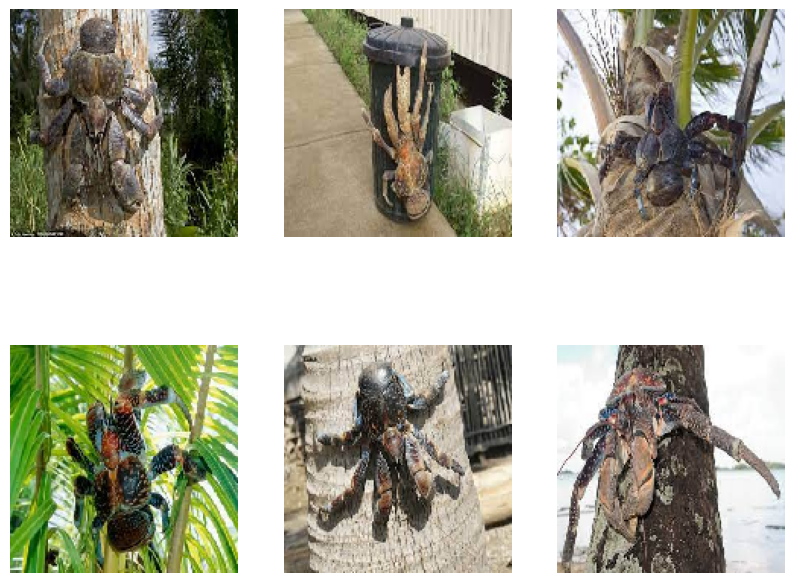

king_crab images:


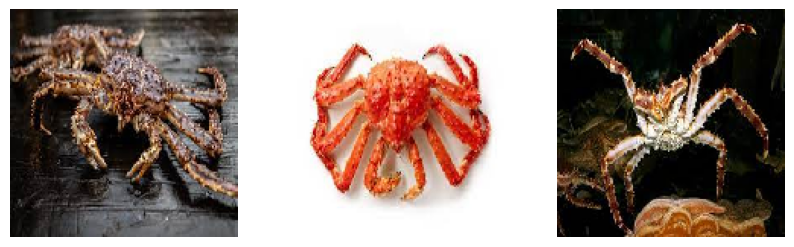

mud_crab images:


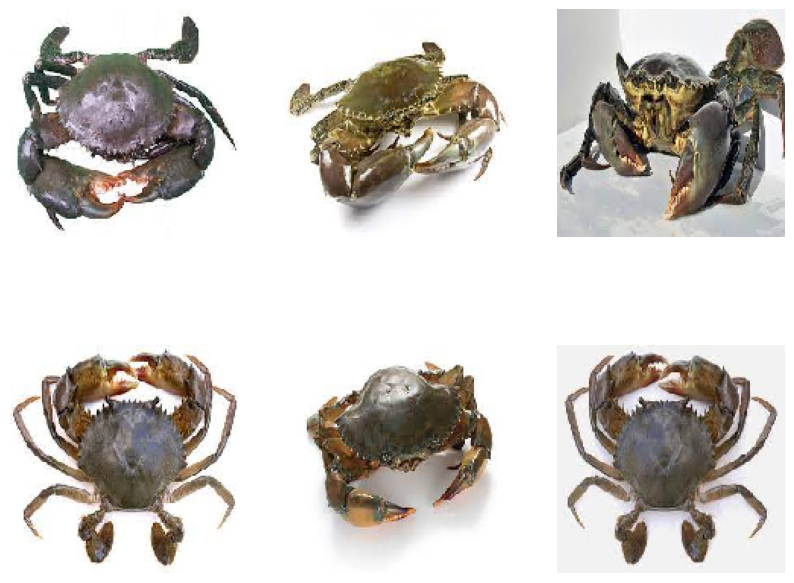

stone_crab images:


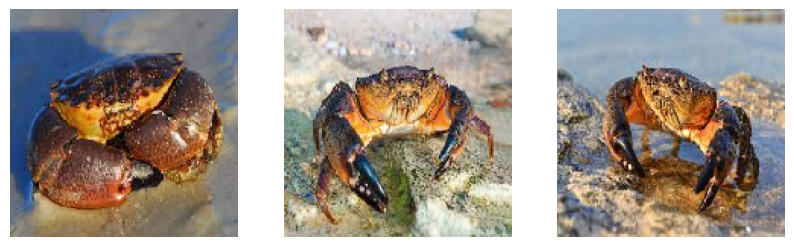

vampire_crab images:


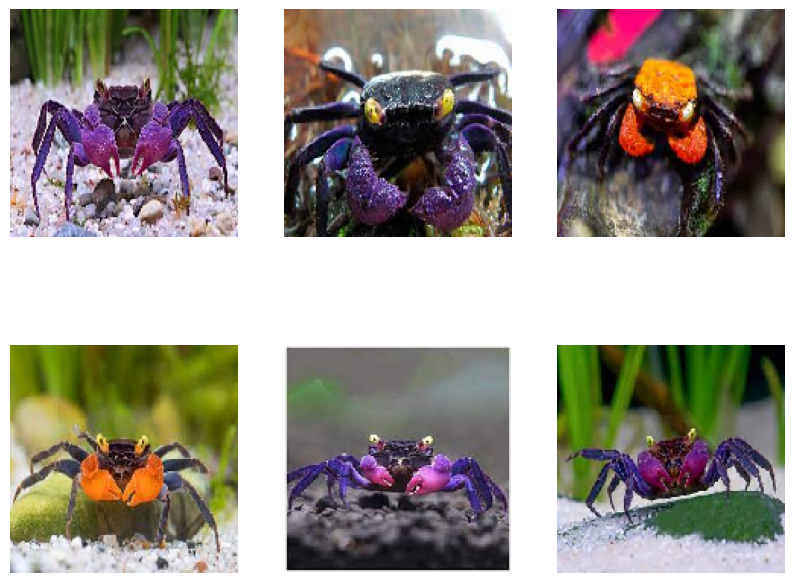

In [3]:
def display_images(class_name,num_images):
    class_dir=os.path.join(train_dir,class_name)
    images=os.listdir(class_dir)
    plt.figure(figsize=(10,8))
    for i in range(num_images):
        plt.subplot(2,3,i+1)
        img=load_img(os.path.join(class_dir, images[i]),target_size=(150,150))
        plt.imshow(img)
        plt.axis('off')
    plt.show()

print("blue_crab images:")
display_images('blue_crab',6)

print("coconut_crab images:")
display_images('coconut_crab',6)

print("king_crab images:")
display_images('king_crab',3)

print("mud_crab images:")
display_images('mud_crab',6)

print("stone_crab images:")
display_images('stone_crab',3)

print("vampire_crab images:")
display_images('vampire_crab',6)


In [4]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
    train_dir,
    batch_size=16,
    class_mode='categorical'
)
    
test_generator=test_datagen.flow_from_directory(
    test_dir,
    batch_size=16,
    class_mode='categorical'
)
  

Found 328 images belonging to 6 classes.


Found 30 images belonging to 6 classes.


In [5]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(6,activation='sigmoid')
])

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
history=model.fit(train_generator,epochs=30,validation_data=train_generator)

Epoch 1/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 17s 661ms/step - accuracy: 0.2115 - loss: 1.7896 - val_accuracy: 0.2866 - val_loss: 1.7479
Epoch 2/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 595ms/step - accuracy: 0.2231 - loss: 1.7496 - val_accuracy: 0.3262 - val_loss: 1.6689
Epoch 3/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 602ms/step - accuracy: 0.3276 - loss: 1.6395 - val_accuracy: 0.3537 - val_loss: 1.5548
Epoch 4/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 592ms/step - accuracy: 0.3311 - loss: 1.5349 - val_accuracy: 0.3933 - val_loss: 1.4529
Epoch 5/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 15s 653ms/step - accuracy: 0.4073 - loss: 1.4468 - val_accuracy: 0.4970 - val_loss: 1.3204
Epoch 6/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 592ms/step - accuracy: 0.4826 - loss: 1.3406 - val_accuracy: 0.4756 - val_loss: 1.3486
Epoch 7/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 599ms/step - accuracy: 0.4270 - loss: 1.3729 - val_accuracy: 0.4848 - val_loss: 1.2672
Epoch 8/30
21/21 ━━━━━━━━━━━━━━━━━━━━ 14s 598ms/step - accuracy: 0.4011 - loss: 1.4747 - val_accu

In [7]:
loss,accuracy=model.evaluate(test_generator)
print(f'Validation Accuracy: {accuracy*100:.2f}%')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5653 - loss: 1.2803
Validation Accuracy: 56.67%


In [1]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1, len(acc) +1)

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,9))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

NameError: name 'history' is not defined